In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib   # 한국어 출력되게 

### 간단한 시계열 데이터 만들기
## < 정상시계열 >
# 랜덤 변동 시계열

In [3]:
dd = np.array([1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208]).reshape(5,4)
dd

# numpy 배열 생성
# reshape(5,4) 메서드를 사용해 5행 4열의 2D 배열로 변환

array([[1342, 1442, 1252, 1343],
       [1425, 1362, 1256, 1272],
       [1243, 1359, 1412, 1253],
       [1201, 1478, 1322, 1406],
       [1254, 1289, 1497, 1208]])

In [4]:
dd_ts = pd.DataFrame(dd, index=range(2016, 2021), columns = ['Qt1', 'Qt2', 'Qt3', 'Qt4'])
dd_ts

# dd 배열을 Pandas DataFrame으로 변환

,Qt1,Qt2,Qt3,Qt4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


데이터프레임 dd_ts의 행과 열을 stack(스택)방식으로 변환하고 인덱스 초기화

In [5]:
dd_ts.stack()

# stack() 메서드는 DataFrame에서 열(Qt1, Qt2, Qt3, Qt4)을 인덱스로 쌓아올려서 
# Series 형태로 변환하는 메서드
# 이때 DataFrame은 "행-열" 형식에서 "행-인덱스" 형식으로 변경됨
# 결과는 MultiIndex를 가지는 Pandas Series가 됨


# 연도(year) & 분기(quarter)를 인덱스로 가지고
# 각 분기의 데이터를 순차적으로 나열한 형태의 Series

2016  Qt1    1342
      Qt2    1442
      Qt3    1252
      Qt4    1343
2017  Qt1    1425
      Qt2    1362
      Qt3    1256
      Qt4    1272
2018  Qt1    1243
      Qt2    1359
      Qt3    1412
      Qt4    1253
2019  Qt1    1201
      Qt2    1478
      Qt3    1322
      Qt4    1406
2020  Qt1    1254
      Qt2    1289
      Qt3    1497
      Qt4    1208
dtype: int32

In [6]:
dd_ts = dd_ts.stack().reset_index()
dd_ts

# reset_index() : 인덱스를 초기화하여 기존 인덱스 값들을 새로운 열로 변환

,level_0,level_1,0
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [7]:
dd_ts.columns = ['year', 'quarter', 'value']
dd_ts

# 칼럼 이름 지정하기 

,year,quarter,value
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [8]:
dd_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [9]:
dd_ts['year'] = dd_ts['year'].apply(str)
dd_ts['year'].dtype

# year 칼럼 int 로 되어 있는거, 문자열로 바꾸기 

dtype('O')

In [10]:
dd_ts['date'] = dd_ts['year'] + dd_ts['quarter']

In [11]:
dd_ts['date']

0     2016Qt1
1     2016Qt2
2     2016Qt3
3     2016Qt4
4     2017Qt1
5     2017Qt2
6     2017Qt3
7     2017Qt4
8     2018Qt1
9     2018Qt2
10    2018Qt3
11    2018Qt4
12    2019Qt1
13    2019Qt2
14    2019Qt3
15    2019Qt4
16    2020Qt1
17    2020Qt2
18    2020Qt3
19    2020Qt4
Name: date, dtype: object

In [12]:
dd_ts['date'] = dd_ts['date'].str.replace("t", "")
dd_ts['date']

0     2016Q1
1     2016Q2
2     2016Q3
3     2016Q4
4     2017Q1
5     2017Q2
6     2017Q3
7     2017Q4
8     2018Q1
9     2018Q2
10    2018Q3
11    2018Q4
12    2019Q1
13    2019Q2
14    2019Q3
15    2019Q4
16    2020Q1
17    2020Q2
18    2020Q3
19    2020Q4
Name: date, dtype: object

date 컬럼을 분기(quarter) 주기로 변환 후 타임스탬프 형식으로 변경

In [13]:
dd_ts['date'] = pd.PeriodIndex(dd_ts['date'], freq = 'Q').to_timestamp()
dd_ts


# date 컬럼을 분기(quarter) 주기로 변환 후 타임스탬프 형식으로 변경
# dd_ts['date'] 열의 값을 분기(Quarterly) 기반으로 PeriodIndex 객체로 변환
# PeriodIndex : Pandas에서 특정 주기(여기서는 분기)와 관련된 시점을 나타내는 객체
# freq='Q'는 분기 주기를 설정하는 옵션

# .to_timestamp() : PeriodIndex를 생성한 후, 이를 타임스탬프로 변환
# 2020년 1분기(2020Q1) : 2020-01-01 00:00:00 타임스탬프로 변환

,year,quarter,value,date
0,2016,Qt1,1342,2016-01-01
1,2016,Qt2,1442,2016-04-01
2,2016,Qt3,1252,2016-07-01
3,2016,Qt4,1343,2016-10-01
4,2017,Qt1,1425,2017-01-01
5,2017,Qt2,1362,2017-04-01
6,2017,Qt3,1256,2017-07-01
7,2017,Qt4,1272,2017-10-01
8,2018,Qt1,1243,2018-01-01
9,2018,Qt2,1359,2018-04-01


In [14]:
dd_ts = dd_ts.set_index('date')
dd_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qt1,1342
2016-04-01,2016,Qt2,1442
2016-07-01,2016,Qt3,1252
2016-10-01,2016,Qt4,1343
2017-01-01,2017,Qt1,1425
2017-04-01,2017,Qt2,1362
2017-07-01,2017,Qt3,1256
2017-10-01,2017,Qt4,1272
2018-01-01,2018,Qt1,1243


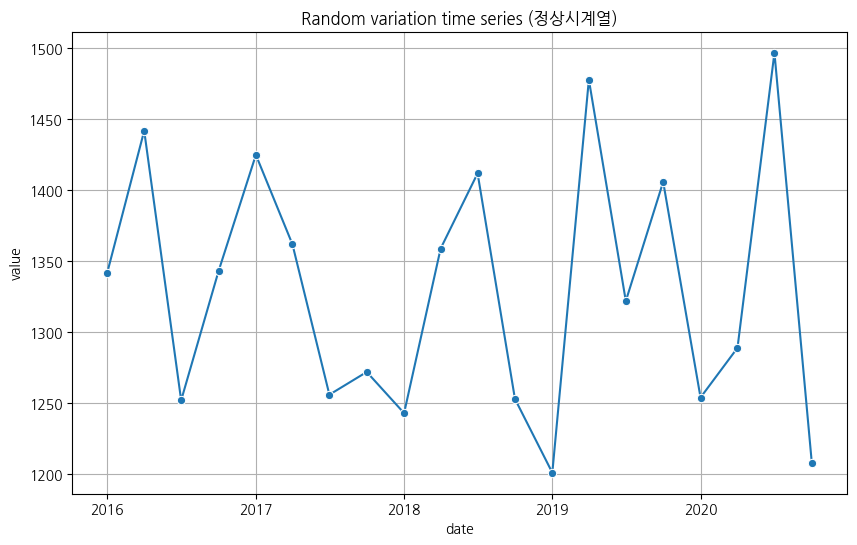

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=dd_ts.index, y=dd_ts['value'], marker='o')
plt.title("Random variation time series (정상시계열)")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

평균과 분산이 일정하다. 

# 계절 변동 시계열 (Seasonality)

ex) 강수량, 적설량, 아이스크림 판매 추이, 스키복 판매 추이, 전력 소비량 등

In [16]:
season1 = np.array((1142, 1242, 1452, 1543,
                   1125, 1262, 1456, 1572,
                   1143, 1269, 1462, 1553,
                   1121, 1258, 1472, 1546, 
                   1154, 1249, 1477, 1548)).reshape(5,4)

season1_ts = pd.DataFrame(season1, index = range(2016, 2021), columns = ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'])
season1_ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1269,1462,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [17]:
season1_ts = season1_ts.stack().reset_index()
season1_ts

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1452
3,2016,Qtr4,1543
4,2017,Qtr1,1125
5,2017,Qtr2,1262
6,2017,Qtr3,1456
7,2017,Qtr4,1572
8,2018,Qtr1,1143
9,2018,Qtr2,1269


In [18]:
season1_ts.columns = ['year', 'quarter', 'value']

In [19]:
season1_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [20]:
season1_ts['year'] = season1_ts['year'].apply(str)
season1_ts['year'].dtype

# year 칼럼 int 로 되어 있는거, 문자열로 바꾸기 

dtype('O')

In [21]:
season1_ts['date'] = season1_ts['year'] + season1_ts['quarter']
season1_ts['date']

0     2016Qtr1
1     2016Qtr2
2     2016Qtr3
3     2016Qtr4
4     2017Qtr1
5     2017Qtr2
6     2017Qtr3
7     2017Qtr4
8     2018Qtr1
9     2018Qtr2
10    2018Qtr3
11    2018Qtr4
12    2019Qtr1
13    2019Qtr2
14    2019Qtr3
15    2019Qtr4
16    2020Qtr1
17    2020Qtr2
18    2020Qtr3
19    2020Qtr4
Name: date, dtype: object

In [22]:
season1_ts['date'] = season1_ts['date'].str.replace("tr", "")
season1_ts['date']

0     2016Q1
1     2016Q2
2     2016Q3
3     2016Q4
4     2017Q1
5     2017Q2
6     2017Q3
7     2017Q4
8     2018Q1
9     2018Q2
10    2018Q3
11    2018Q4
12    2019Q1
13    2019Q2
14    2019Q3
15    2019Q4
16    2020Q1
17    2020Q2
18    2020Q3
19    2020Q4
Name: date, dtype: object

In [23]:
season1_ts['date'] = pd.PeriodIndex(season1_ts['date'], freq = 'Q').to_timestamp()
season1_ts


# date 컬럼을 분기(quarter) 주기로 변환 후 타임스탬프 형식으로 변경

,year,quarter,value,date
0,2016,Qtr1,1142,2016-01-01
1,2016,Qtr2,1242,2016-04-01
2,2016,Qtr3,1452,2016-07-01
3,2016,Qtr4,1543,2016-10-01
4,2017,Qtr1,1125,2017-01-01
5,2017,Qtr2,1262,2017-04-01
6,2017,Qtr3,1456,2017-07-01
7,2017,Qtr4,1572,2017-10-01
8,2018,Qtr1,1143,2018-01-01
9,2018,Qtr2,1269,2018-04-01


In [24]:
season1_ts = season1_ts.set_index('date')
season1_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qtr1,1142
2016-04-01,2016,Qtr2,1242
2016-07-01,2016,Qtr3,1452
2016-10-01,2016,Qtr4,1543
2017-01-01,2017,Qtr1,1125
2017-04-01,2017,Qtr2,1262
2017-07-01,2017,Qtr3,1456
2017-10-01,2017,Qtr4,1572
2018-01-01,2018,Qtr1,1143


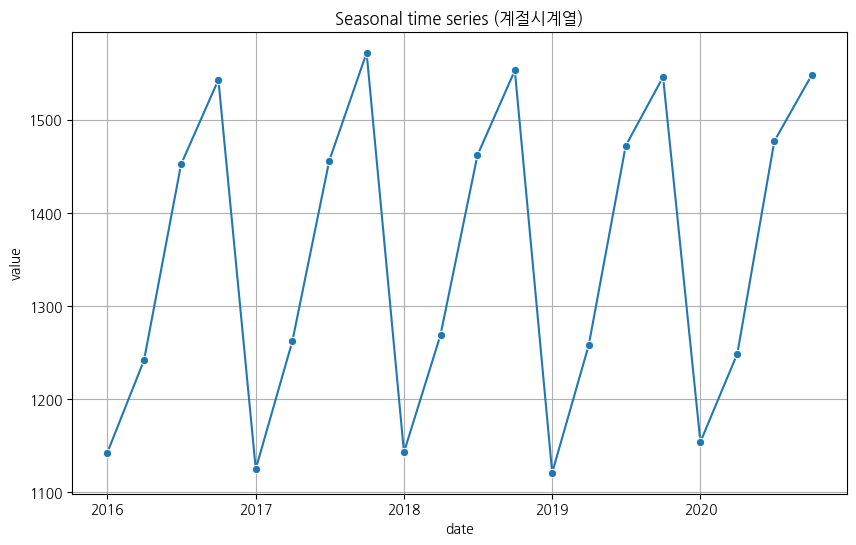

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x=season1_ts.index, y=season1_ts['value'], marker='o')
plt.title("Seasonal time series (계절시계열)")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

# 추세변동 시계열
ex) 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가지수 데이터

In [26]:
trend = np.array((1142, 1242, 1252, 1343,
                    1225, 1562, 1356, 1572,
                    1343, 1459, 1412, 1453,
                    1401, 1478, 1322, 1606,
                    1554, 1589, 1597, 1408) ).reshape(5,4)
trend_ts = pd.DataFrame(trend, index=range(2016, 2021), columns=['Qtr1', 'Qtr2','Qtr3','Qtr4'])
trend_ts = trend_ts.stack().reset_index()
display(trend_ts)

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1252
3,2016,Qtr4,1343
4,2017,Qtr1,1225
5,2017,Qtr2,1562
6,2017,Qtr3,1356
7,2017,Qtr4,1572
8,2018,Qtr1,1343
9,2018,Qtr2,1459


In [27]:
trend_ts.columns = ['year', 'quarter', 'value']

In [28]:
trend_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [29]:
trend_ts['year'] = trend_ts['year'].apply(str)
trend_ts['year'].dtype

# year 칼럼 int 로 되어 있는거, 문자열로 바꾸기 

dtype('O')

In [30]:
trend_ts['date'] = trend_ts['year'] + trend_ts['quarter']
trend_ts['date']

0     2016Qtr1
1     2016Qtr2
2     2016Qtr3
3     2016Qtr4
4     2017Qtr1
5     2017Qtr2
6     2017Qtr3
7     2017Qtr4
8     2018Qtr1
9     2018Qtr2
10    2018Qtr3
11    2018Qtr4
12    2019Qtr1
13    2019Qtr2
14    2019Qtr3
15    2019Qtr4
16    2020Qtr1
17    2020Qtr2
18    2020Qtr3
19    2020Qtr4
Name: date, dtype: object

In [31]:
trend_ts['date'] = trend_ts['date'].str.replace("tr", "")
trend_ts['date']

0     2016Q1
1     2016Q2
2     2016Q3
3     2016Q4
4     2017Q1
5     2017Q2
6     2017Q3
7     2017Q4
8     2018Q1
9     2018Q2
10    2018Q3
11    2018Q4
12    2019Q1
13    2019Q2
14    2019Q3
15    2019Q4
16    2020Q1
17    2020Q2
18    2020Q3
19    2020Q4
Name: date, dtype: object

In [32]:
trend_ts['date'] = pd.PeriodIndex(trend_ts['date'], freq = 'Q').to_timestamp()
trend_ts


# date 컬럼을 분기(quarter) 주기로 변환 후 타임스탬프 형식으로 변경

,year,quarter,value,date
0,2016,Qtr1,1142,2016-01-01
1,2016,Qtr2,1242,2016-04-01
2,2016,Qtr3,1252,2016-07-01
3,2016,Qtr4,1343,2016-10-01
4,2017,Qtr1,1225,2017-01-01
5,2017,Qtr2,1562,2017-04-01
6,2017,Qtr3,1356,2017-07-01
7,2017,Qtr4,1572,2017-10-01
8,2018,Qtr1,1343,2018-01-01
9,2018,Qtr2,1459,2018-04-01


In [33]:
trend_ts = trend_ts.set_index('date')
trend_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qtr1,1142
2016-04-01,2016,Qtr2,1242
2016-07-01,2016,Qtr3,1252
2016-10-01,2016,Qtr4,1343
2017-01-01,2017,Qtr1,1225
2017-04-01,2017,Qtr2,1562
2017-07-01,2017,Qtr3,1356
2017-10-01,2017,Qtr4,1572
2018-01-01,2018,Qtr1,1343


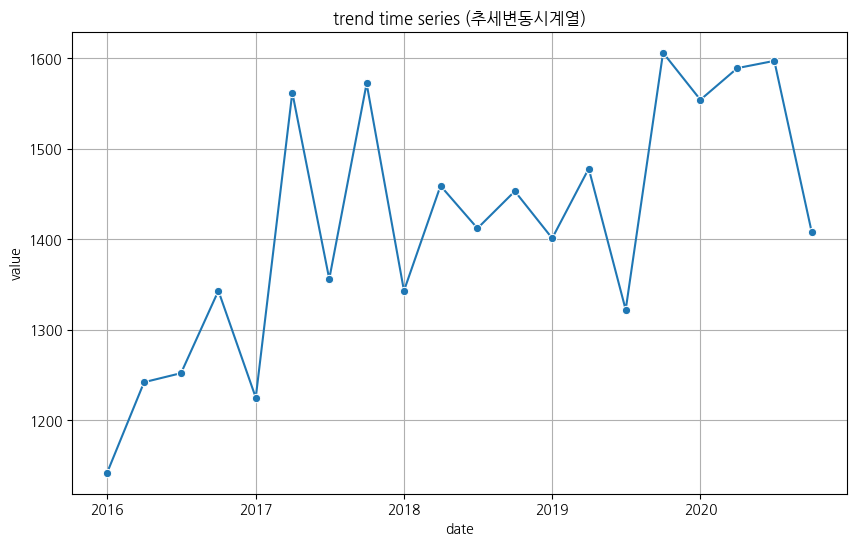

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x=trend_ts.index, y=trend_ts['value'], marker='o')
plt.title("trend time series (추세변동시계열)")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

# 계절적 추세변동 시계열 데이터 (복합적)
* 복합적이다. 계절적 + 추세적

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# 계절적 추세변동 시계열 데이터 생성
st1 = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948])


# 시계열 데이터의 인덱스를 2016년 1분기부터 시작해 분기별로 생성
index = pd.date_range(start='2016Q1', periods=len(st1), freq='QE')
st1_ts = pd.Series(st1, index=index)
st1_ts

2016-03-31    1142
2016-06-30    1242
2016-09-30    1452
2016-12-31    1543
2017-03-31    1225
2017-06-30    1362
2017-09-30    1556
2017-12-31    1672
2018-03-31    1343
2018-06-30    1459
2018-09-30    1662
2018-12-31    1753
2019-03-31    1421
2019-06-30    1558
2019-09-30    1772
2019-12-31    1846
2020-03-31    1554
2020-06-30    1649
2020-09-30    1877
2020-12-31    1948
Freq: QE-DEC, dtype: int32

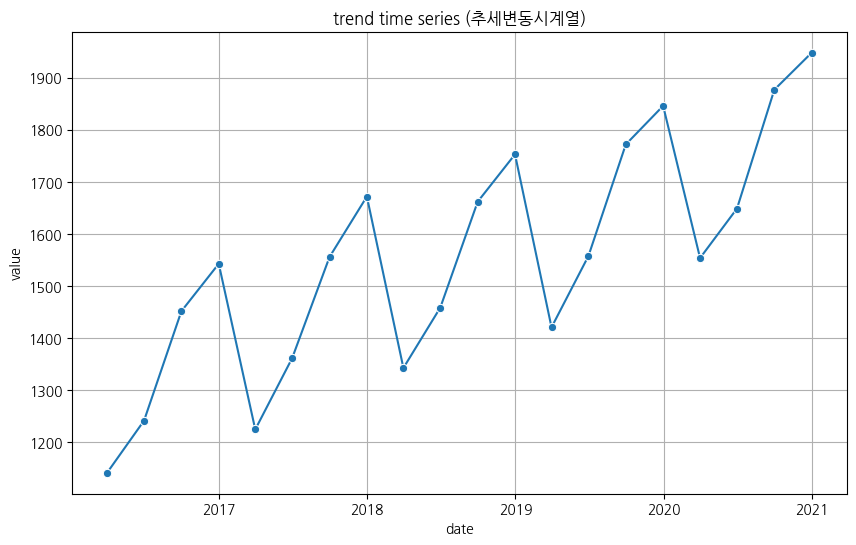

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x=st1_ts.index, y=st1_ts.values, marker='o')
plt.title("trend time series (추세변동시계열)")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

이 그래프는 계절적 + 추세적이 복합적으로 드러난다. 

# * 최종 : 여러가지 시계열 데이터 모아보기 

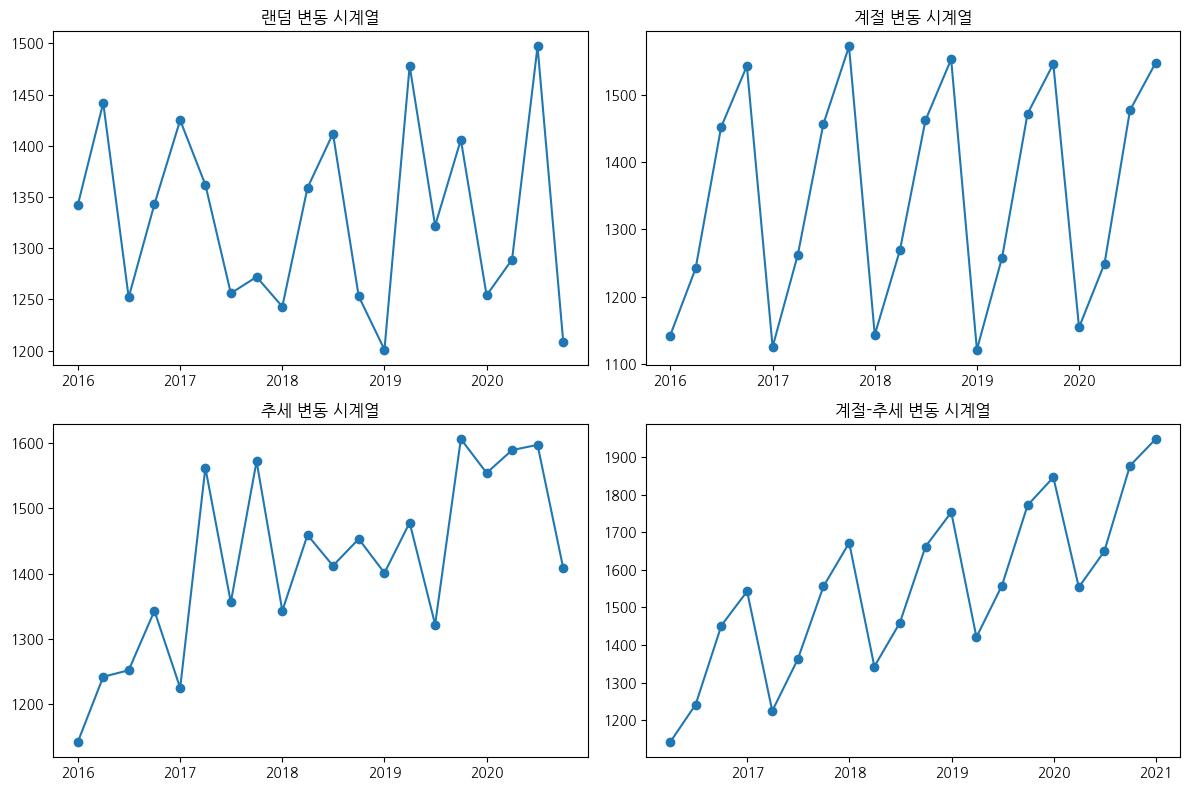

In [38]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

# 랜덤 변동 시계열
axs[0,0].plot(dd_ts.index, dd_ts['value'], marker = 'o')
axs[0,0].set_title("랜덤 변동 시계열")

# 계절 변동 시계열
axs[0,1].plot(season1_ts.index, season1_ts['value'], marker = 'o')
axs[0,1].set_title("계절 변동 시계열")

# 추세 변동 시계열 
axs[1,0].plot(trend_ts.index, trend_ts['value'], marker = 'o')
axs[1,0].set_title("추세 변동 시계열")

# 계절-추세 변동 시계열
axs[1,1].plot(st1_ts.index, st1_ts.values, marker = 'o')
axs[1,1].set_title("계절-추세 변동 시계열")


plt.tight_layout()
plt.show()

## Air passenger 데이터로 시각화해보기 

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

In [40]:
# air passenger 데이터 로드

airpass_data = get_rdataset('AirPassengers', package='datasets')

In [41]:
airpass_data

<class 'statsmodels.datasets.utils.Dataset'>

In [42]:
airpass_data.data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [43]:
airpass_ts = pd.Series(airpass_data.data['value'].values, 
                      index = pd.date_range(start='1949-01', periods=len(airpass_data.data), freq="ME"))

airpass_ts

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: ME, Length: 144, dtype: int64


### < freq 파라미터 종류 >
- Q : quarter 
- QE : quarter end
- M : month 
- ME : month end 

### air passenger 데이터 그래프 그리기 

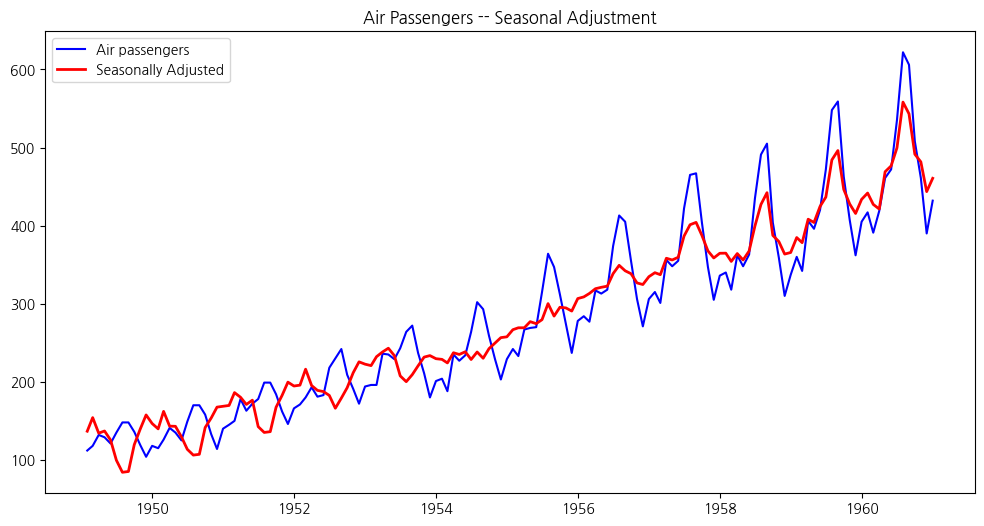

In [44]:
plt.figure(figsize=(12,6))
plt.plot(airpass_ts, label="Air passengers", color='blue')
result_airpass=seasonal_decompose(airpass_ts, model='additive')
seasonal_adjusted_airpass = airpass_ts - result_airpass.seasonal
plt.plot(seasonal_adjusted_airpass, label="Seasonally Adjusted", color = 'red', linewidth=2)
plt.title("Air Passengers -- Seasonal Adjustment")
plt.legend()
plt.show()


해석 : 현대로 진화할수록 비행기를 타는 비율이 높아짐

이 코드의 흐름은 항공 승객 데이터를 시각화하고, 계절성을 분해한 후 계절 조정된 데이터를 시각화하는 과정. 계절성이 제거된 데이터와 원래 데이터를 함께 비교할 수 있어, 계절적 패턴을 명확히 제거한 후의 트렌드를 파악할 수 있음.
<br><br>


- seasonal_decompose 함수 : 시계열 데이터를 계절성(seasonality), 추세(trend), 잔차(residual)로 분해
<br><br>
- seasonal_adjusted_airpass = airpass_ts - result_airpass.seasonal   <br>
계절성을 제거하는 것, 계절성을 제거하여 계절 조정된 데이터(seasonally adjusted data)를 생성한다. 원래 데이터 airpass_ts에서 계절성 성분을 뺌으로써 계절적 변동을 제거한 것

# ---------------------------------------------------------------------

# 차분 (Difference) : diff

차분 : 현 시점의 자료값에서 전 시점의 자료값을 뺀 것


In [45]:
# Create the DataFrame (assuming 'Date' is the index)
data = {
    'Year': [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020],
    'Quarter': ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
    'Value': [1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208]
}
index = pd.date_range(start='2016-01-01', periods=len(data['Year']), freq='QE')
dd_ts = pd.DataFrame(data, index=index)

dd_ts

,Year,Quarter,Value
2016-03-31,2016,Qtr1,1342
2016-06-30,2016,Qtr2,1442
2016-09-30,2016,Qtr3,1252
2016-12-31,2016,Qtr4,1343
2017-03-31,2017,Qtr1,1425
2017-06-30,2017,Qtr2,1362
2017-09-30,2017,Qtr3,1256
2017-12-31,2017,Qtr4,1272
2018-03-31,2018,Qtr1,1243
2018-06-30,2018,Qtr2,1359


### 1차 차분

In [46]:
dd_ts['value_diff'] = dd_ts['Value'].diff()
dd_ts

,Year,Quarter,Value,value_diff
2016-03-31,2016,Qtr1,1342,NaN
2016-06-30,2016,Qtr2,1442,100.0
2016-09-30,2016,Qtr3,1252,-190.0
2016-12-31,2016,Qtr4,1343,91.0
2017-03-31,2017,Qtr1,1425,82.0
2017-06-30,2017,Qtr2,1362,-63.0
2017-09-30,2017,Qtr3,1256,-106.0
2017-12-31,2017,Qtr4,1272,16.0
2018-03-31,2018,Qtr1,1243,-29.0
2018-06-30,2018,Qtr2,1359,116.0


NaN 으로 나온 이유는 위에 값이 없기 때문. 

### 2차 차분


In [47]:
dd_ts['value_diff2'] = dd_ts['Value'].diff(2)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2
2016-03-31,2016,Qtr1,1342,NaN,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0
2016-12-31,2016,Qtr4,1343,91.0,-99.0
2017-03-31,2017,Qtr1,1425,82.0,173.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0
2018-06-30,2018,Qtr2,1359,116.0,87.0


### 3차 차분

In [48]:
dd_ts['value_diff3'] = dd_ts['Value'].diff(3)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,value_diff3
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0


In [49]:
dd_ts['cycle'] = dd_ts.index.quarter 
dd_ts

# cycle = quarter 

,Year,Quarter,Value,value_diff,value_diff2,value_diff3,cycle
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN,1
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN,2
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN,3
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0,4
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0,1
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0,2
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0,3
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0,4
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0,1
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0,2


## shift 이전 시점으로 이동 = lag 

In [50]:
dd_ts['lagged_value'] = dd_ts['Value'].shift(2)

# 1342 가 두칸 밀려서 내려옴

In [51]:
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,value_diff3,cycle,lagged_value
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN,1,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN,2,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN,3,1342.0
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0,4,1442.0
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0,1,1252.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0,2,1343.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0,3,1425.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0,4,1362.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0,1,1256.0
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0,2,1272.0


In [52]:
# lagged data 의 분기(quarter)를 나타내는 열 추가 

dd_ts['lagged_cycle'] = dd_ts.index.shift(2, freq='QE').quarter 
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,value_diff3,cycle,lagged_value,lagged_cycle
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN,1,NaN,3
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN,2,NaN,4
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN,3,1342.0,1
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0,4,1442.0,2
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0,1,1252.0,3
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0,2,1343.0,4
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0,3,1425.0,1
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0,4,1362.0,2
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0,1,1256.0,3
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0,2,1272.0,4


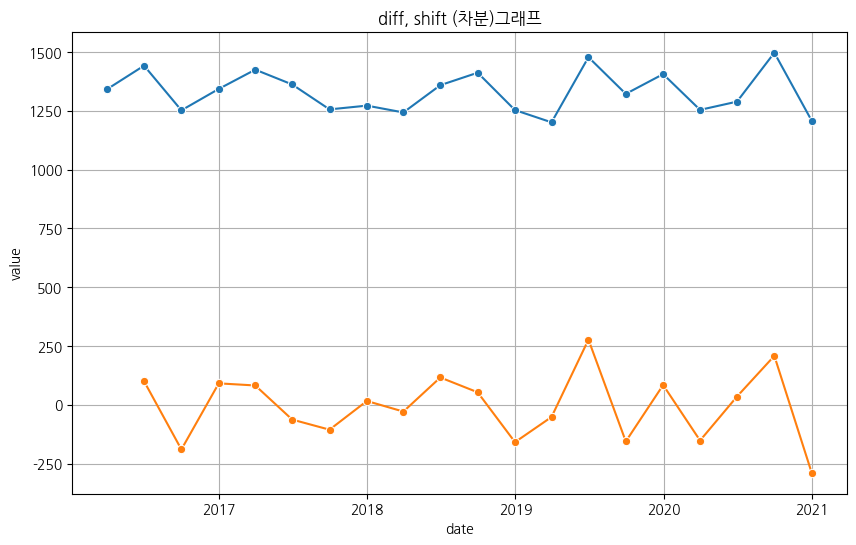

In [53]:
plt.figure(figsize=(10,6))
# value 그래프 
sns.lineplot(x=dd_ts.index, y=dd_ts['Value'].values, marker='o')
# value_diff 그래프 
sns.lineplot(x=dd_ts.index, y=dd_ts['value_diff'].values, marker='o')



plt.title("diff, shift (차분)그래프")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

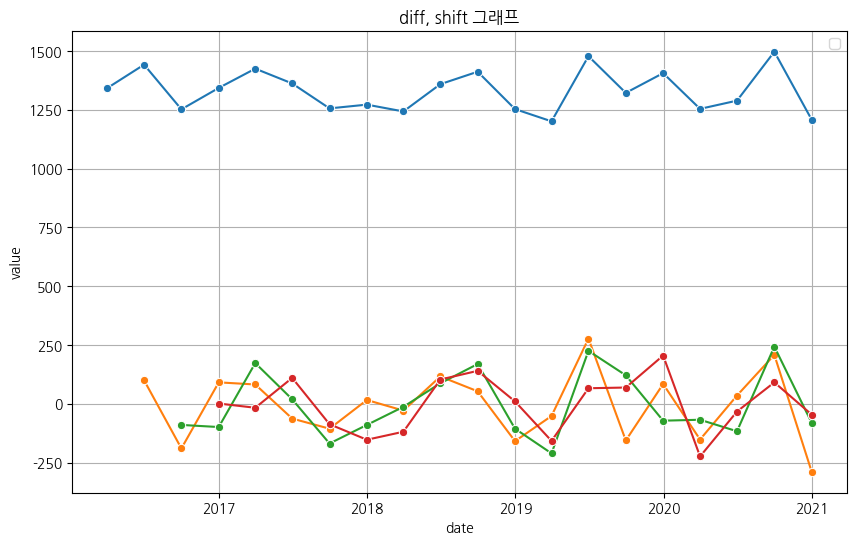

In [55]:
# 시계열 데이터 시각화
plt.figure(figsize=(10,6))

# Value 그래프
sns.lineplot(x=dd_ts.index, y=dd_ts['Value'].values, marker='o')

# value_diff1 그래프
sns.lineplot(x=dd_ts.index, y=dd_ts['value_diff'].values, marker='o')

# value_diff2 그래프
sns.lineplot(x=dd_ts.index, y=dd_ts['value_diff2'].values, marker='o')

# value_diff3 그래프
sns.lineplot(x=dd_ts.index, y=dd_ts['value_diff3'].values, marker='o')

plt.title('diff, shift 그래프')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()


## 시계열의 합집합 교집합
* 2개의 시계열 데이터가 있을 때 1개로 합치는 것
* 합집합 데이터 1, 데이터 2에 있는 모든 자료를 유지하면서 합침
* 교집합 데이터 1과 2에 모두 있는 데이터를 합침

In [56]:
data1 = np.arange(1,25).reshape(8,3)
dates1 = pd.date_range(start="2019Q1", periods = 8, freq = 'QE')
prod1 = pd.DataFrame(data1, index=dates1, columns=['web', 'app', 'hyb'])
prod1

,web,app,hyb
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [57]:
data2 = np.arange(11,23).reshape(4,3)
dates2 = pd.date_range(start="2020Q1", periods = 4, freq = 'QE')
prod2 = pd.DataFrame(data2, index=dates2, columns=['web', 'app', 'hyb'])
prod2

,web,app,hyb
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,17,18,19
2020-12-31,20,21,22


In [59]:
# 두개 데이터 합치기 1

result1 = pd.concat([prod1, prod2]).sort_index()
result1

,web,app,hyb
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-03-31,11,12,13
2020-06-30,16,17,18
2020-06-30,14,15,16
2020-09-30,19,20,21
2020-09-30,17,18,19


In [60]:
# 두개 데이터 합치기 2

result2 = pd.concat([prod1, prod2], axis = 1).sort_index()
result2

,web,app,hyb,web,app,hyb
2019-03-31,1,2,3,NaN,NaN,NaN
2019-06-30,4,5,6,NaN,NaN,NaN
2019-09-30,7,8,9,NaN,NaN,NaN
2019-12-31,10,11,12,NaN,NaN,NaN
2020-03-31,13,14,15,11.0,12.0,13.0
2020-06-30,16,17,18,14.0,15.0,16.0
2020-09-30,19,20,21,17.0,18.0,19.0
2020-12-31,22,23,24,20.0,21.0,22.0


< 시계열의 교집합 >

In [61]:
# 교집합 인덱스 계산

common_index = prod1.index.intersection(prod2.index)
common_index 

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='QE-DEC')

In [62]:
# 교집합을 기반으로 prod1 과 prod2 에서 행을 선택

intersect_df1 = prod1.loc[common_index]
intersect_df1

,web,app,hyb
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [63]:
# 교집합을 기반으로 prod1 과 prod2 에서 행을 선택

intersect_df2 = prod2.loc[common_index]
intersect_df2

,web,app,hyb
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,17,18,19
2020-12-31,20,21,22


In [64]:
intersect_result = pd.merge(intersect_df1, intersect_df2, how='inner', on = intersect_df1.index)
intersect_result

,key_0,web_x,app_x,hyb_x,web_y,app_y,hyb_y
0,2020-03-31,13,14,15,11,12,13
1,2020-06-30,16,17,18,14,15,16
2,2020-09-30,19,20,21,17,18,19
3,2020-12-31,22,23,24,20,21,22


## 시계열 자료의 부분 추출 및 수정 : window

In [66]:
prod1

,web,app,hyb
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [65]:
# 특정구간 2019 3분기만 추출

prod1_window = prod1.loc['2019Q3':'2019Q3']
prod1_window

,web,app,hyb
2019-09-30,7,8,9


In [68]:
# 2019년 3분기부터 2020년 2분기까지 데이터 추출

prod1_window = prod1.loc['2019Q3':'2020Q2']
prod1_window

,web,app,hyb
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18


In [69]:
prod2

,web,app,hyb
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,17,18,19
2020-12-31,20,21,22


In [71]:
# 2020년 3분기 데이터를 11, 22, 33 수정

prod2.loc['2020Q3'] = [11,22,33]
prod2

,web,app,hyb
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,11,22,33
2020-12-31,20,21,22


## resample 함수 : 시계열 데이터를 새로운 빈도로 재구성하는 함수

- YE : 연말 year end
- M : 월별 데이터 
- W : 주별 데이터 weeekday 

In [72]:
prod1

,web,app,hyb
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [75]:
annual_prod1 = prod1.resample('YE').sum()
annual_prod1

# 연도별로 더한 값

,web,app,hyb
2019-12-31,22,26,30
2020-12-31,70,74,78


In [76]:
# 반기별로 데이터를 집계 (두개의 분기를 하나로 묶어 평균 계산)

semi_annual_prod1 = prod1.resample('2Q').mean()
semi_annual_prod1

,web,app,hyb
2019-03-31,1.0,2.0,3.0
2019-09-30,5.5,6.5,7.5
2020-03-31,11.5,12.5,13.5
2020-09-30,17.5,18.5,19.5
2021-03-31,22.0,23.0,24.0


In [77]:
# 반기별로 데이터를 집계 (두개의 분기를 하나로 묶어 총합 계산)

semi_annual_prod2 = prod1.resample('2Q').sum()
semi_annual_prod2 

,web,app,hyb
2019-03-31,1,2,3
2019-09-30,11,13,15
2020-03-31,23,25,27
2020-09-30,35,37,39
2021-03-31,22,23,24


< 시계열 분석 기법 >
1) 이동평균법 <br>
- 이동평균법은시계열 데이터에서 일정 기간별로자료를묶어 평균을구하는방법이다. 
- 시간이 지남에 따라 평균 계산에 포함되는 자토 가 바뀌기 때문에 이동평균법이라고 한다. 변동이 많 
은 시계열 데이터의 명균을 구함으로써 여러 요인으로 인한 변동을 없앨 수 있다.

2) 지수평활법   <br>
- 이동평균법은 장기적인 추세를 파익히는 데는 효과적이나 m 기간에 따라 평균의 수가 감소하는 단 
점이있다. 
- 지수평활법은 이런 문제점을 해결하기 위해 사용하는 방법으로 최근 자료가 과거 자료보다 예측에 
효과적이라는가정하에최근데이터일수록큰가중치를부여하고 오래된데이터일수록작은비중을 
부여하는 방식을 사용해 평균을 계산한다.

## 시계열 데이터 EDA 
* 상태-공간 모형(state-space model) : 과거 데이터를 이용해서 현재값, 미래값을 추측
* 필터링(filtering), 스무딩(smoothing) 작업을 하게 됨

### Smoothing(평활화) 
- 시계열 자료에서 무작위성을 줄이는 기법
- 평활화에 필터링이 포함되기도 함 
- 이동평균 평활법(Moving Average, MA Smoothing)
- 지수평활법(Exponential Smoothing) : 단순지수평활, 이중지수평활

# 이동평균 평활법(Moving Average) 

In [78]:
import statsmodels.api as sm

In [79]:
# 'AirPassengers' 데이터셋 불러오기
data = sm.datasets.get_rdataset('AirPassengers', 'datasets')
air_passengers = data.data

# 데이터 출력
air_passengers

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [81]:
air_passengers.index = pd.date_range(start = '1949-01', periods = len(air_passengers), freq = 'ME')
air_passengers

,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121
...,...,...
1960-08-31,1960.583333,606
1960-09-30,1960.666667,508
1960-10-31,1960.750000,461
1960-11-30,1960.833333,390


In [82]:
# 3개월 이동평균 구하기 

ma3 = air_passengers['value'].rolling(window=3).mean()
ma3

In [83]:
ma3

1949-01-31           NaN
1949-02-28           NaN
1949-03-31    120.666667
1949-04-30    126.333333
1949-05-31    127.333333
                 ...    
1960-08-31    587.666667
1960-09-30    578.666667
1960-10-31    525.000000
1960-11-30    453.000000
1960-12-31    427.666667
Freq: ME, Name: value, Length: 144, dtype: float64

In [85]:
# 6개월 이동평균 구하기 

ma6 = air_passengers['value'].rolling(window=6).mean()
ma6

1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
                 ...    
1960-08-31    519.166667
1960-09-30    534.000000
1960-10-31    534.000000
1960-11-30    520.333333
1960-12-31    503.166667
Freq: ME, Name: value, Length: 144, dtype: float64

In [84]:
# 12개월 이동평균 구하기 

ma12 = air_passengers['value'].rolling(window=12).mean()
ma12.head(15)

1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
1949-06-30           NaN
1949-07-31           NaN
1949-08-31           NaN
1949-09-30           NaN
1949-10-31           NaN
1949-11-30           NaN
1949-12-31    126.666667
1950-01-31    126.916667
1950-02-28    127.583333
1950-03-31    128.333333
Freq: ME, Name: value, dtype: float64

Text(0.5, 1.0, '12-points moving average')

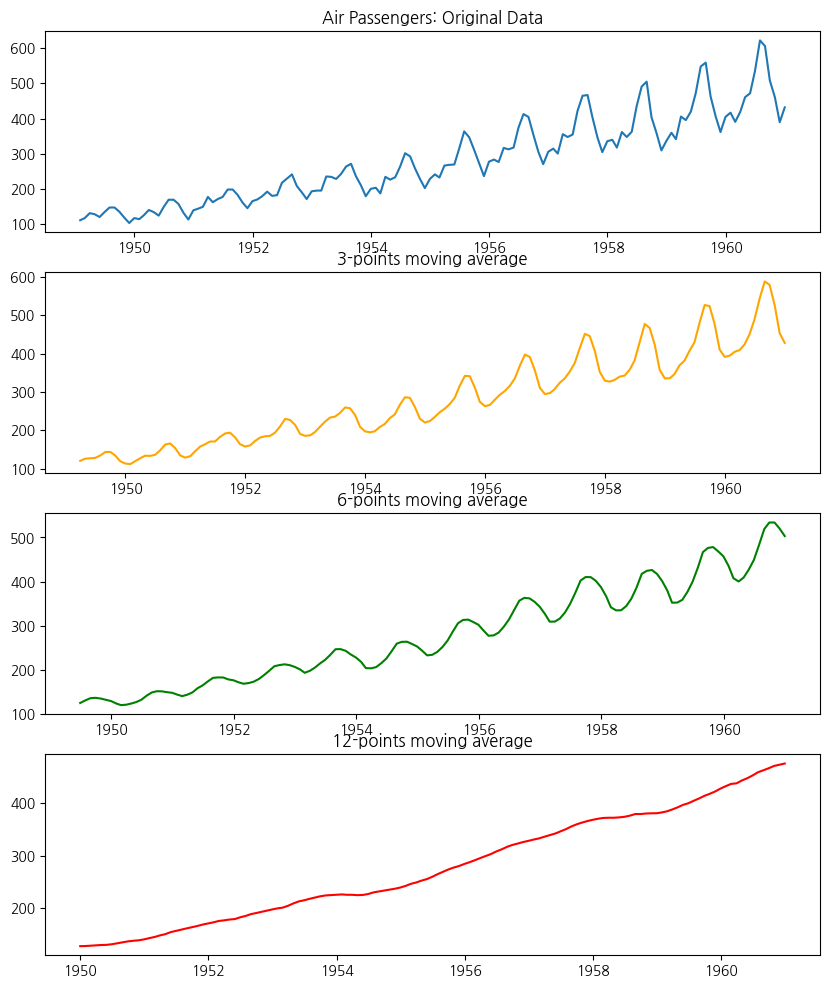

In [90]:
fig, axs = plt.subplots(4,1,figsize=(10,12))

# 원본데이터
axs[0].plot(air_passengers.index, air_passengers['value'], label='Original_data')
axs[0].set_title("Air Passengers: Original Data")


# 3개월 이동 평균
axs[1].plot(air_passengers.index, ma3, label='3-points moving average', color = 'orange')
axs[1].set_title("3-points moving average")


# 6개월 이동 평균
axs[2].plot(air_passengers.index, ma6, label='6-points moving average', color = 'green')
axs[2].set_title("6-points moving average")


# 12개월 이동 평균
axs[3].plot(air_passengers.index, ma12, label='12-points moving average', color = 'red')
axs[3].set_title("12-points moving average")